In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#data = pd.read_csv('iris.csv')
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names
feauture_name = iris.feature_names


In [ ]:
X = data[:,:2].copy()
y = target.copy()
n_split = int(X.shape[0]*0.8)
X_train = X[:n_split]
y_train = y[:n_split]
X_test = X[n_split:]
y_test = y[n_split:]

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
fig,ax = plt.subplots(1,1)
lr_roc = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.5, lw=2, label='ROC')

ax.plot(lr_roc[0], lr_roc[1], color='darkorange', lw=2, label='ROC')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc='best')
plt.show()


(42,)
[0.13373016 0.14960317 0.19126984 0.20238095 0.25       0.26587302
 0.3452381  0.35912698 0.375      0.38888889 0.4        0.42777778
 0.45952381 0.48730159 0.53492063 0.54880952 0.56269841 0.58492063
 0.60714286 0.62301587 0.6452381  0.65634921 0.67222222 0.71388889
 0.72777778 0.74166667 0.76388889 0.77777778 0.8        0.81388889
 0.82777778 0.83888889 0.85277778 0.86388889 0.87777778 0.9
 0.91111111 0.96666667 0.97777778 0.98888889 1.         1.        ]


C:\Users\surfa\AppData\Local\Temp/ipykernel_11668/4096566121.py:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])  ### 版本不同


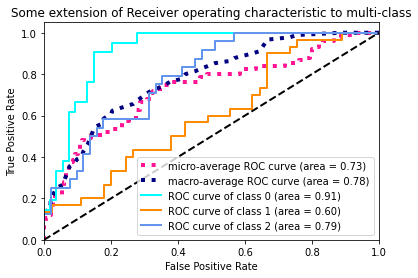

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from scipy.interpolate import lagrange, interp1d

iris = datasets.load_iris()
X = iris.data  # X.shape==(150, 4)
y = iris.target  # y.shape==(150, )

# 二进制化输出
y = label_binarize(y, classes=[0, 1, 2])  # shape==(150, 3)
n_classes = y.shape[1]  # n_classes==3

# 添加噪音特征，使问题更困难
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape  # n_samples==150, n_features==4
X = np.c_[X, random_state.randn(n_samples,
                                200 * n_features)]  # shape==(150, 84)

# 打乱数据集并切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.5,
                                                    random_state=0)

classifier = OneVsRestClassifier(
    svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# 为每个类别计算ROC曲线和AUC
fpr = dict()  ### 假正例率
tpr = dict()  ### 真正例率
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

########################### 计算宏平均ROC曲线和AUC ###########################
### 每个二分类，各自算各自的，再综合
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

########################### 计算微平均ROC曲线和AUC ###########################
### 先综合每个二分类的，再综合
# 汇总所有FPR
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
print(all_fpr.shape)  # (42,)

# 然后再用这些点对ROC曲线进行插值
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    #### 把每个 二分类 结果 加起来了
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])  ### 版本不同
    # f = interp1d(fpr[i], tpr[i])                  ### 这两句和上面一句是一个作用
    # mean_tpr += f(all_fpr)

# 最后求平均并计算AUC
mean_tpr /= n_classes
print(mean_tpr)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

########################### 绘制所有ROC曲线 ###########################
plt.figure()
lw = 2
plt.plot(fpr["micro"],
         tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(
             roc_auc["micro"]),
         color='deeppink',
         linestyle=':',
         linewidth=4)
plt.plot(fpr["macro"],
         tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'.format(
             roc_auc["macro"]),
         color='navy',
         linestyle=':',
         linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i],
             tpr[i],
             color=color,
             lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(
                 i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()